In [1]:
import numpy as np
import matplotlib.pyplot as plt
fruits = np.load('fruits_300.npy')
print(fruits.shape)

(300, 100, 100)


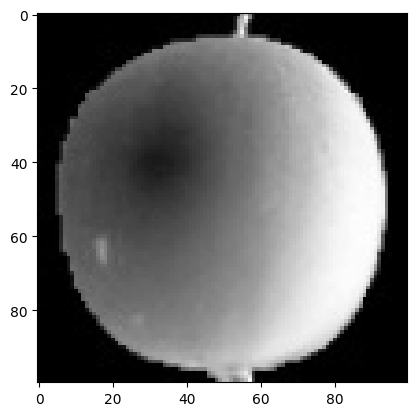

In [2]:
plt.imshow(fruits[0], cmap='gray')
plt.show()

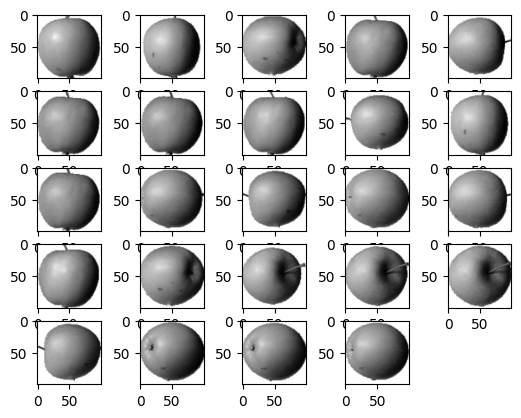

In [3]:
for i in range(1,25):
    plt.subplot(5,5,i)
    plt.imshow(fruits[i], cmap='gray_r')

In [4]:
apple = fruits[0:100].reshape(-1,100*100)
pineapple = fruits[100:200].reshape(-1,100*100)
banana = fruits[200:300].reshape(-1,100*100)

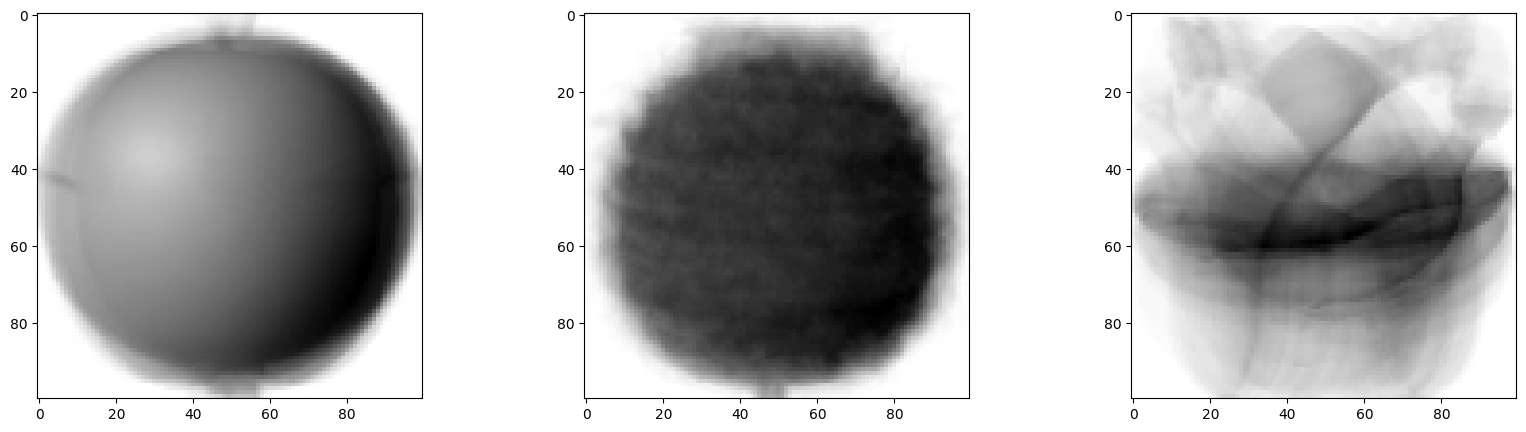

In [5]:
apple_mean = np.mean(apple, axis=0).reshape(100,100)
pineapple_mean = np.mean(pineapple, axis=0).reshape(100,100)
banana_mean = np.mean(banana, axis=0).reshape(100,100)
fig, axis = plt.subplots(1,3, figsize=(20,5))
axis[0].imshow(apple_mean.reshape(-1, 100), cmap='gray_r')
axis[1].imshow(pineapple_mean.reshape(-1,100), cmap='gray_r')
axis[2].imshow(banana_mean.reshape(-1,100), cmap='gray_r')

# 평균과 가까운 사진 고르기

In [6]:
abs_diff = np.abs(fruits-apple_mean)
abs_mean = np.mean(abs_diff, axis=(1,2))
print(abs_mean.shape)

(300,)


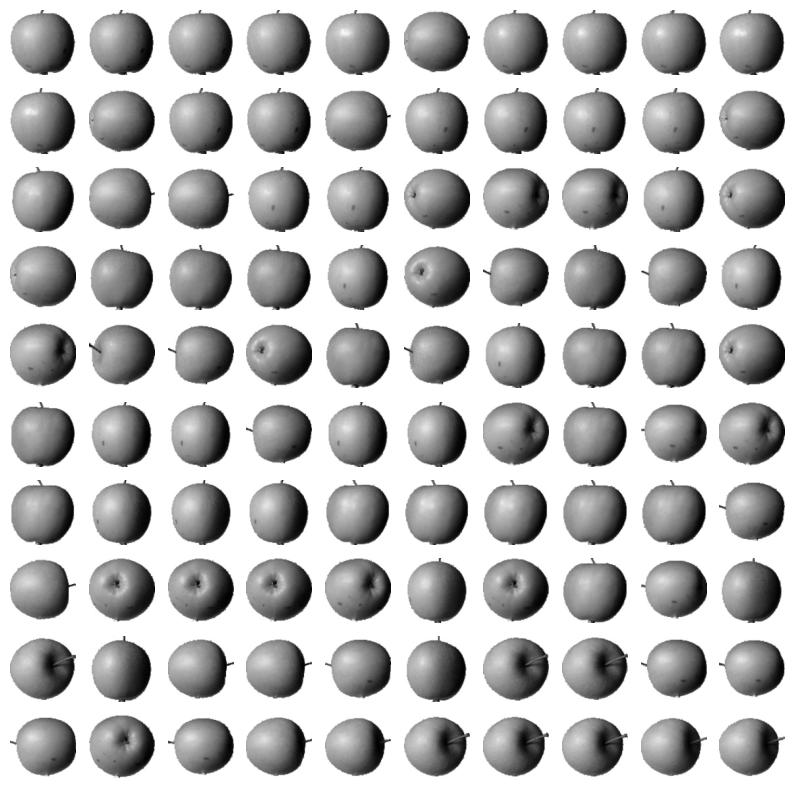

In [7]:
apple_index=np.argsort(abs_mean)[:100]
fig, axs = plt.subplots(10, 10, figsize=(10,10))
for i in range(10):
    for j in range(10):
        axs[i,j].imshow(fruits[apple_index[i*10+j]], cmap='gray_r')
        axs[i,j].axis('off')

# 모델 훈련

In [8]:
from sklearn.cluster import KMeans
fruits_2d = fruits.reshape(300,-1)
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_2d)
print(km.labels_)
print(np.unique(km.labels_, return_counts=True))

C:\Users\user\miniconda3\envs\py\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]
(array([0, 1, 2]), array([111,  98,  91], dtype=int64))


# 머신러닝이 분류한 클러스터를 출력

In [9]:
fruits_0 = fruits[km.labels_==1]

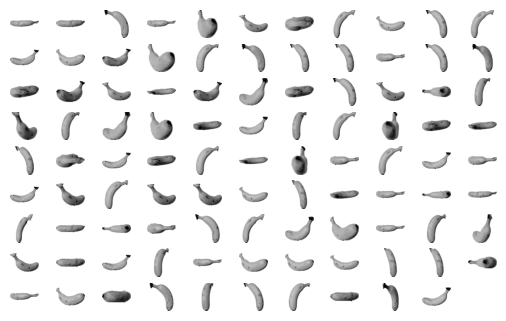

In [10]:
for i in range(len(fruits_0)):
    plt.subplot(11,11,i+1)
    plt.imshow(fruits_0[i],cmap='gray_r')
    plt.axis('off')
plt.show()

# 클러스터 중심값

In [11]:
km.cluster_centers_.shape

(3, 10000)

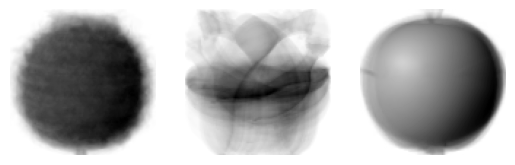

In [12]:
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(km.cluster_centers_[i].reshape(-1,100), cmap='gray_r')
    plt.axis('off')

In [13]:
km.inertia_

5074977316.088373

In [14]:
inertia=[]
for i in range(2,10):
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(fruits_2d)
    inertia.append(km.inertia_)

C:\Users\user\miniconda3\envs\py\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\miniconda3\envs\py\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\miniconda3\envs\py\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\miniconda3\envs\py\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\miniconda3

In [15]:
inertia

[5856532545.983114,
 5074977316.088373,
 4658642911.586957,
 4327753424.627085,
 4049865443.0702515,
 3766674309.643929,
 3457430801.5000496,
 3298085803.9729385]

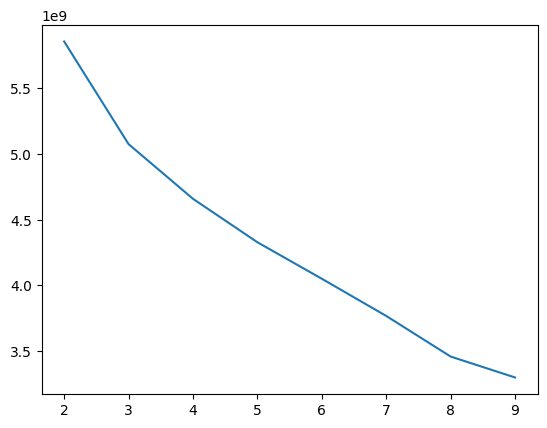

In [16]:
plt.plot(range(2,10), inertia)